In [1]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from src.plots import plotting

mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")
sns.set_palette("deep")


In [2]:
# data
client_tr = pd.read_csv("../data/client.train.csv", parse_dates=["birthdate"])
orders = pd.read_csv("../data/orders.csv", parse_dates=["datetime"])
products = pd.read_csv("../data/product.csv")

# joining orders and products
orders_product_df = pd.merge(left=orders, right=products, on="product_id", how="left")

# saving csv
orders_product_df.to_csv("../data/orders_products_merge.csv", index=False)


In [3]:
orders_product_df


,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08,mk04,mk04:128,mk04:128:103,mk04:128:103:103,mk04:128:103:103:03294
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08,mk04,mk04:292,mk04:292:246,mk04:292:246:103,mk04:292:246:103:04338
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08,mk05,mk05:072,mk05:072:256,mk05:072:256:182,mk05:072:256:182:09643
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08,mk05,mk05:072,mk05:072:056,mk05:072:056:182,mk05:072:056:182:07587
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08,mk17,mk17:251,mk17:251:555,mk17:251:555:070,mk17:251:555:070:01336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168467,ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11,mk22,mk22:098,mk22:098:486,mk22:098:486:103,mk22:098:486:103:07627
168468,ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11,mk22,mk22:098,mk22:098:272,mk22:098:272:103,mk22:098:272:103:04925
168469,ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08,mk22,mk22:100,mk22:100:277,mk22:100:277:103,mk22:100:277:103:04947
168470,ox126589,cx15796,px12043,2019-09-07 04:39:00,1.0,15.00,pm10,1.0,0.0,st01,dv3,sc12,mk22,mk22:100,mk22:100:277,mk22:100:277:103,mk22:100:277:103:04947


## How is the proportion of churn on our Train dataset?


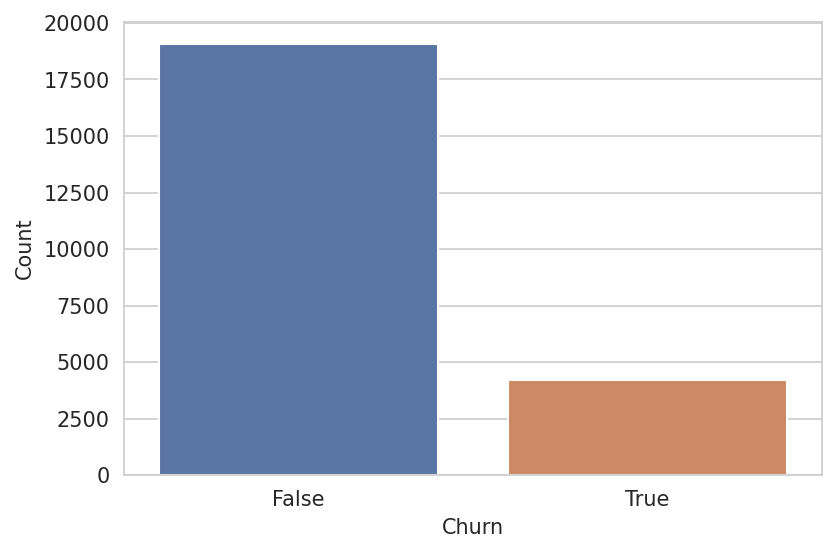

In [5]:
# is_churn proportion
df = client_tr["is_churn"].value_counts(normalize=True).reset_index()

# plotting.bar_plot(x="index", y="is_churn", data=df, xlabel="", ylabel="is_churn")
_ = sns.countplot(x="is_churn", data=client_tr)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


Aqui nóis temos o dado um pouco desbalanceado, certa de **82%** não deram churn, e cerca de **18%** deram.


## Handling with `bithdate` feature


In [6]:
client_tr["age"] = datetime.date.today().year - client_tr["birthdate"].dt.year


## Lets look at the distributions of churning between ages


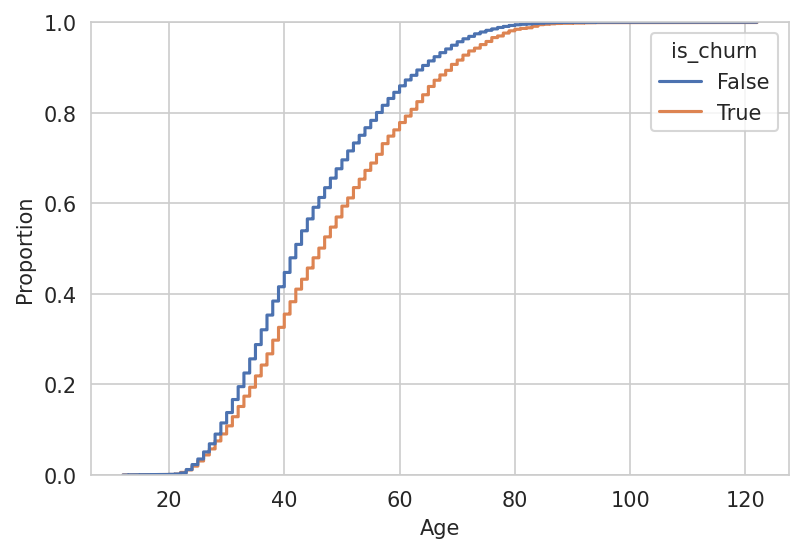

In [9]:
_ = sns.ecdfplot(x="age", data=client_tr, hue="is_churn")
plt.xlabel("Age")
plt.show()


- Acredito que acima dos 30 anos alguns fatores começam a ser mais significativos para definição de churn ou não para o cliente. Pois é justamente onde as distribuições começam a apresentar maior distinção.


## Let's look at Churn by Gender


Text(0, 0.5, 'Count')

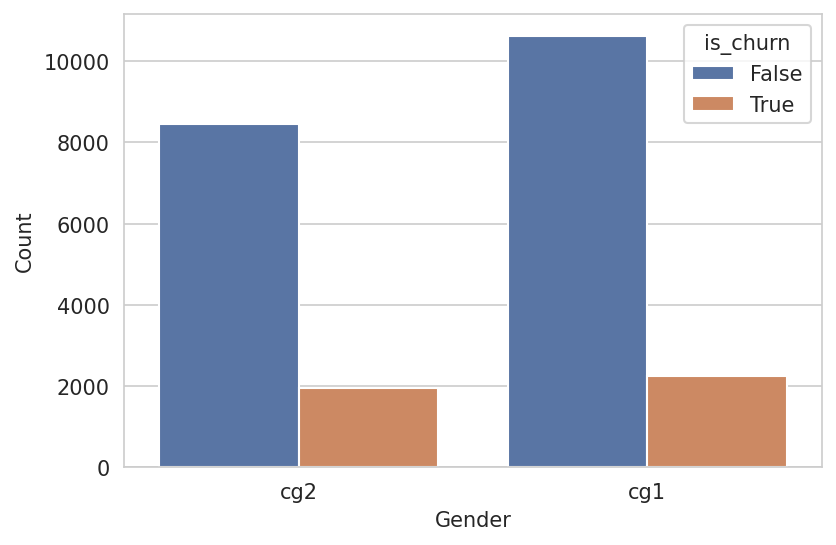

In [10]:
_ = sns.countplot(x="gender", data=client_tr, hue="is_churn")
plt.xlabel("Gender")
plt.ylabel("Count")

## Let's look at the distribution of States and Churn


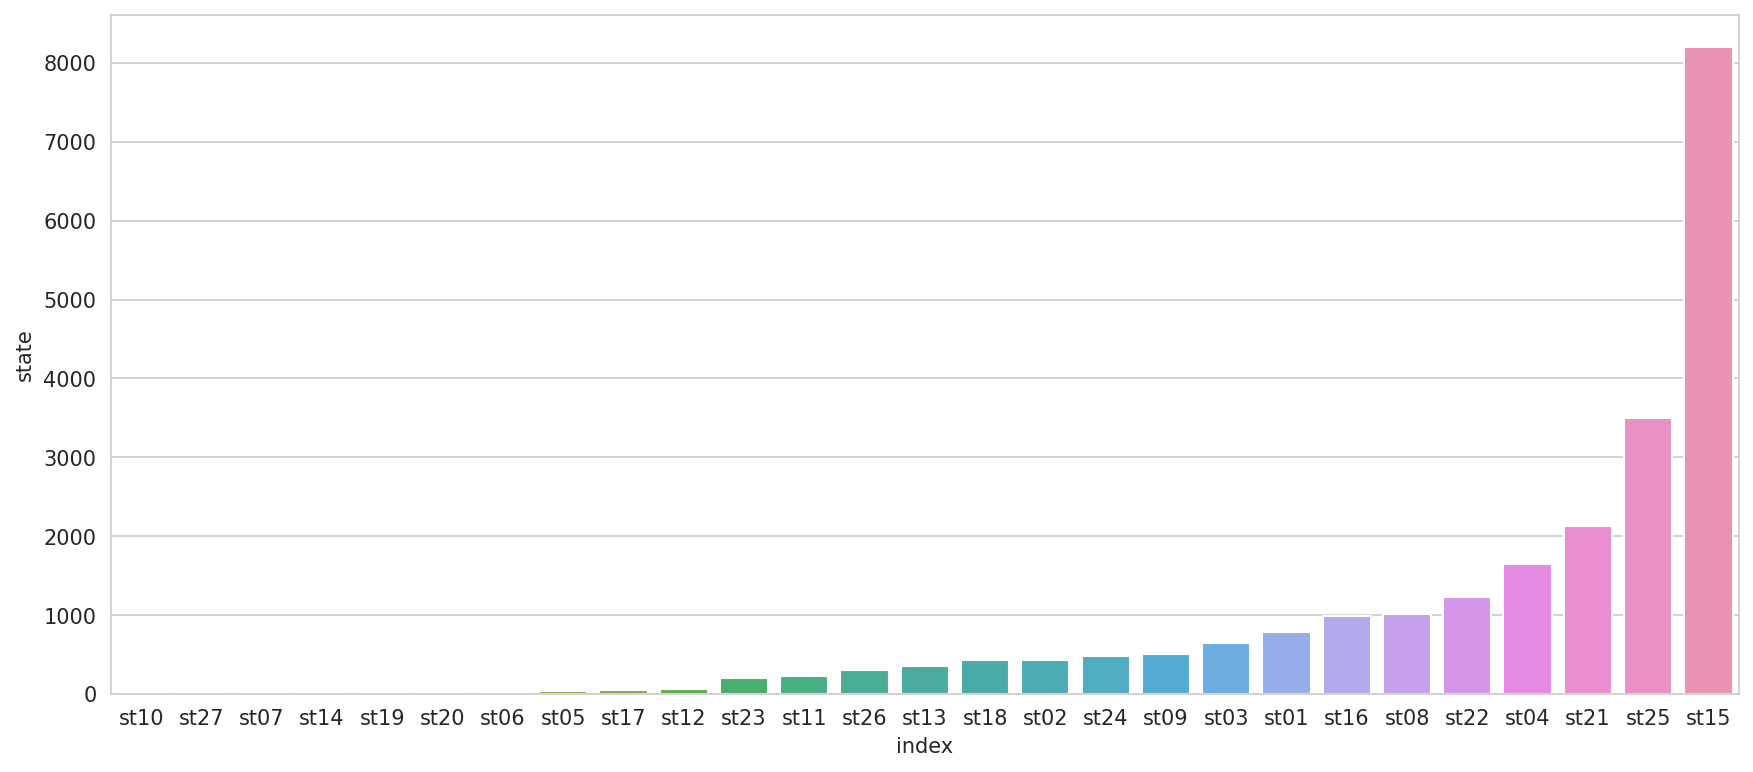

In [12]:
fig_size = (14, 6)

fig, ax = plt.subplots(figsize=fig_size)

# data
df = client_tr["state"].value_counts().reset_index()

_ = sns.barplot(x="index", y="state", data=df.sort_values(["state"]))
plt.show()


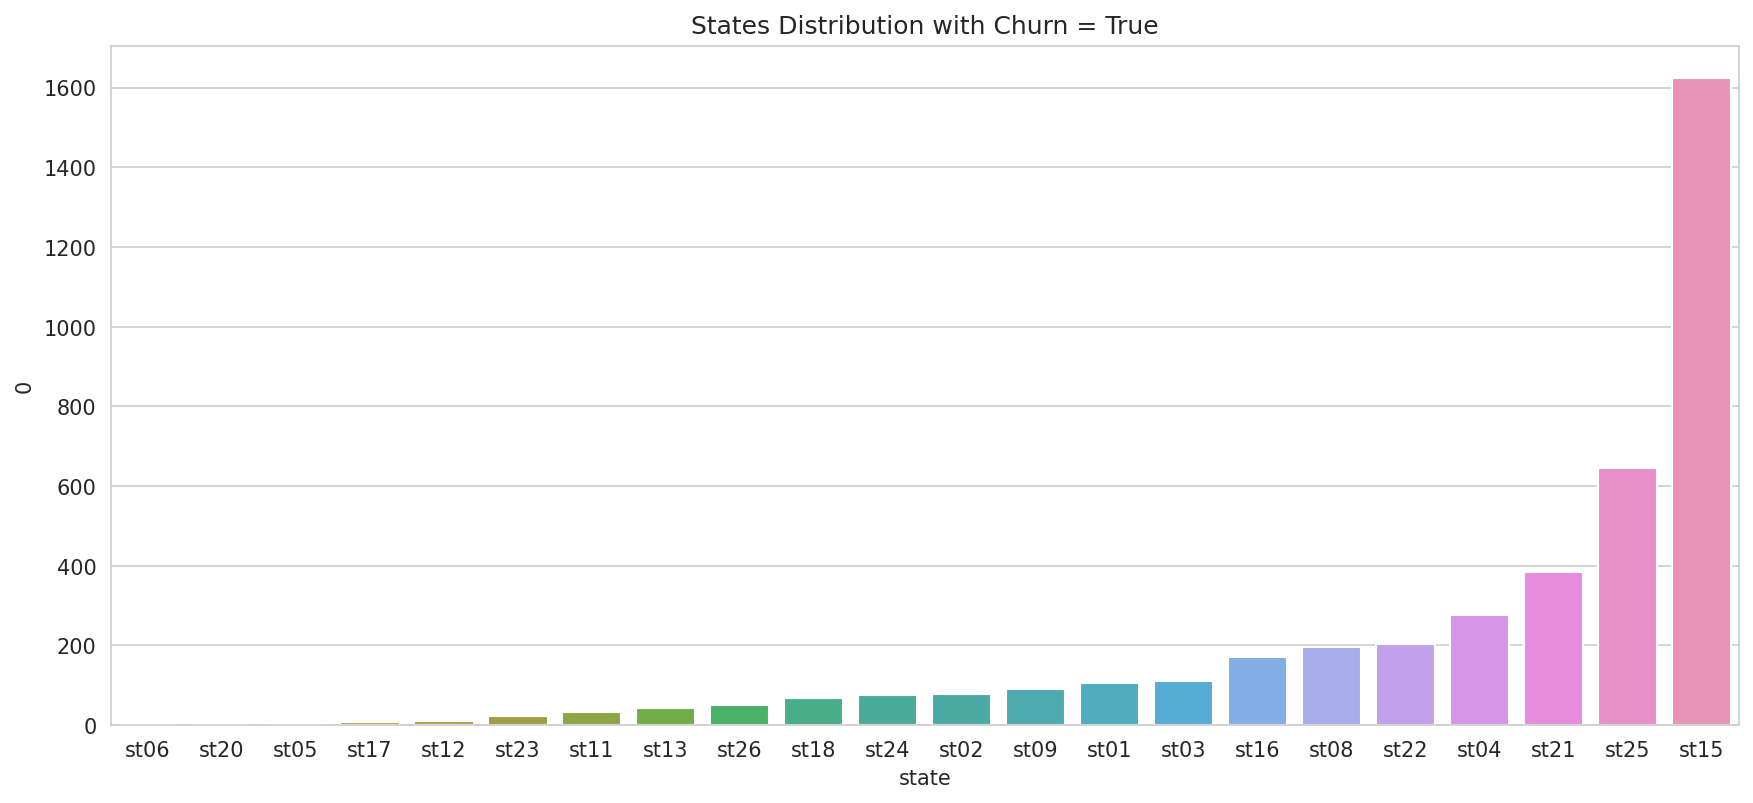

In [26]:
fig_size = (14, 6)

fig, ax = plt.subplots(figsize=fig_size)

# data
df = client_tr[["state", "is_churn"]].value_counts().reset_index()

_ = sns.barplot(x="state", y=0, data=df[df["is_churn"] == True].sort_values([0]))
plt.title("States Distribution with Churn = True")
plt.show()


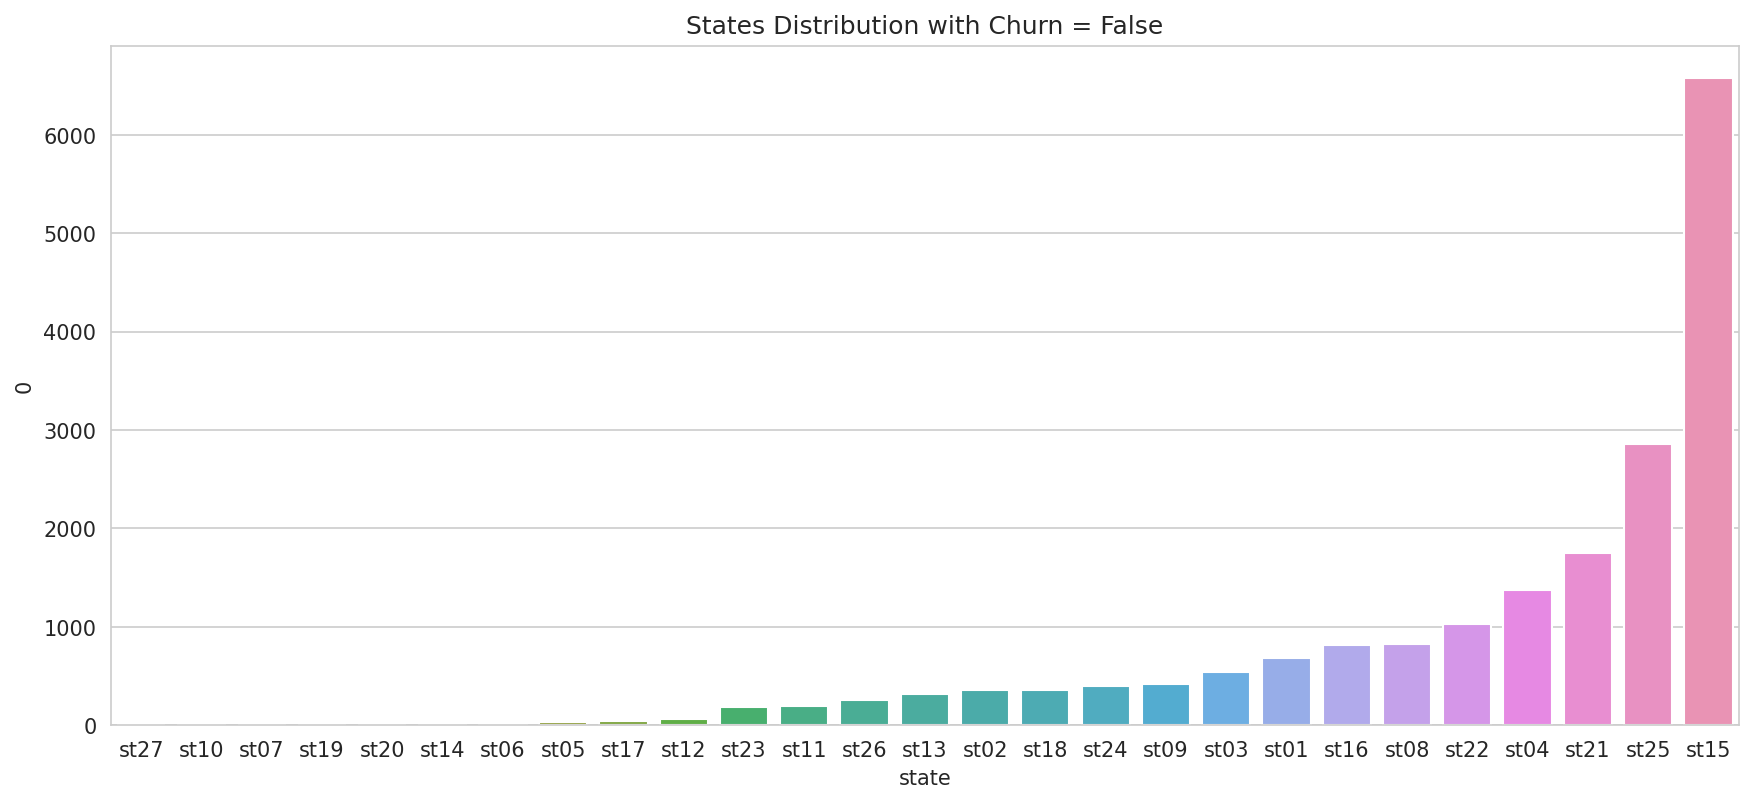

In [27]:
fig_size = (14, 6)

fig, ax = plt.subplots(figsize=fig_size)

# data
df = client_tr[["state", "is_churn"]].value_counts().reset_index()

_ = sns.barplot(x="state", y=0, data=df[df["is_churn"] == False].sort_values([0]))
plt.title("States Distribution with Churn = False")
plt.show()


Vamos ver se essa distribuição é semelhante no dado de teste.


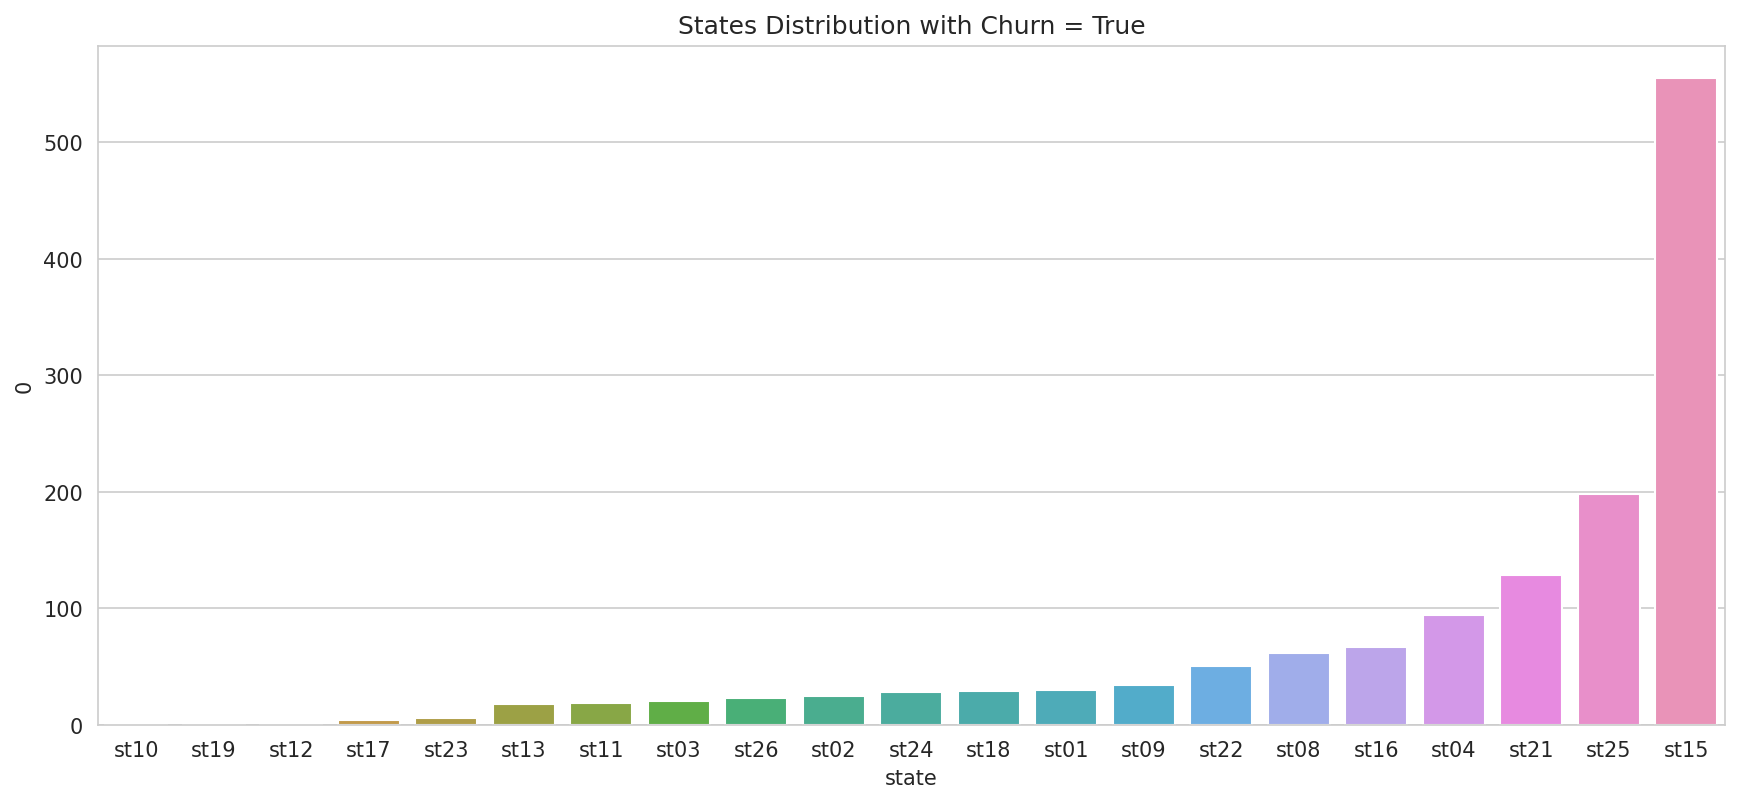

In [29]:
client_tt = pd.read_csv("../data/client.test.csv", parse_dates=["birthdate"])

# plot
fig_size = (14, 6)

fig, ax = plt.subplots(figsize=fig_size)

# data
df = client_tt[["state", "is_churn"]].value_counts().reset_index()

_ = sns.barplot(x="state", y=0, data=df[df["is_churn"] == True].sort_values([0]))
plt.title("States Distribution with Churn = True")
plt.show()


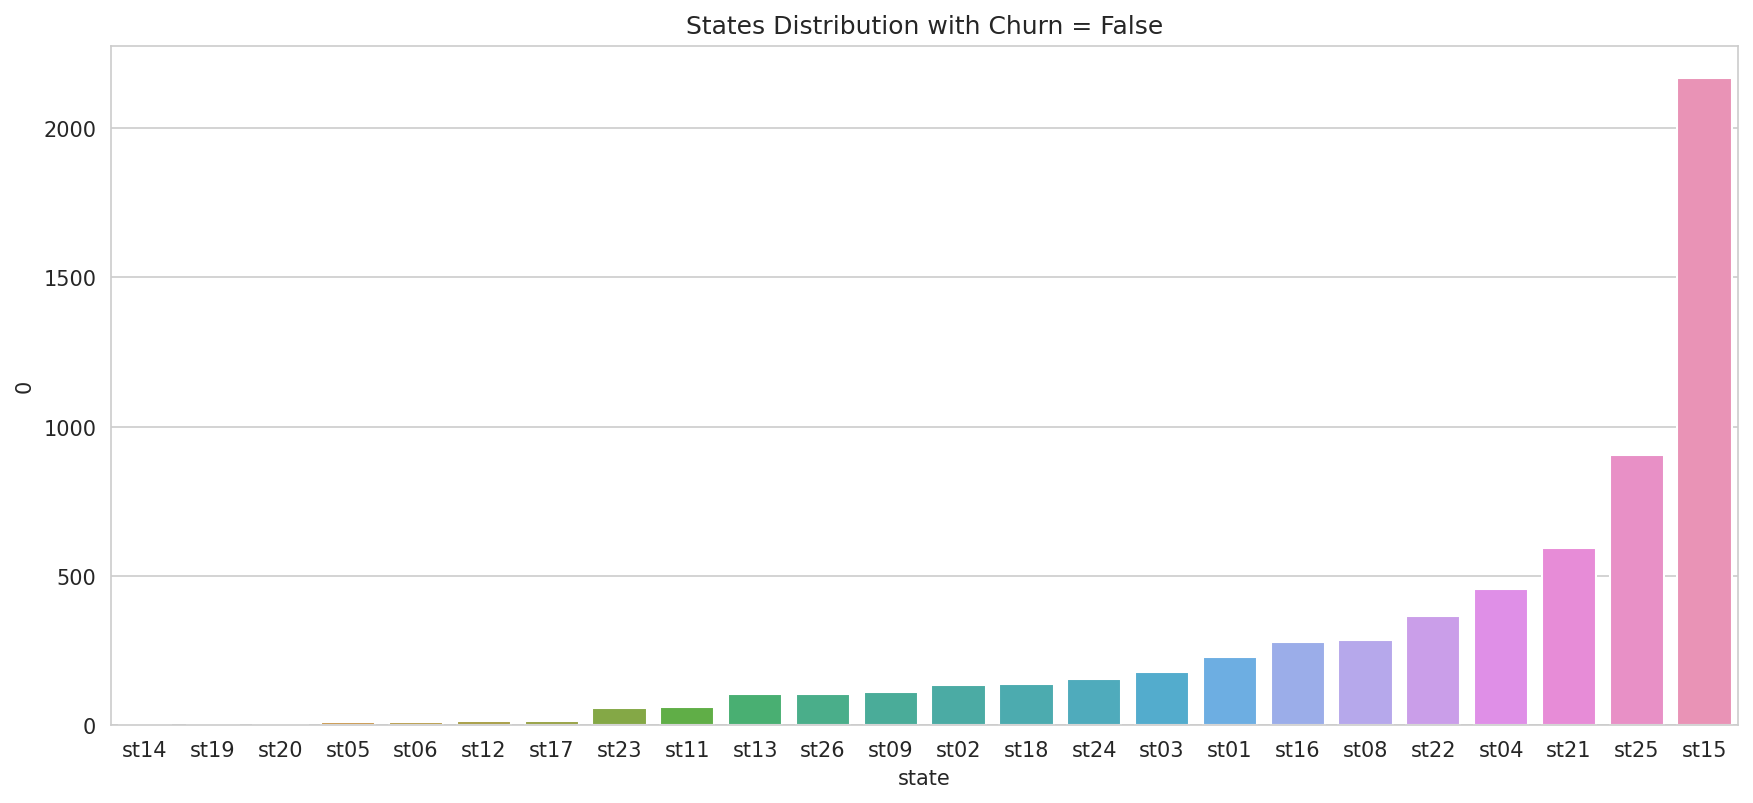

In [30]:
# plot
fig_size = (14, 6)

fig, ax = plt.subplots(figsize=fig_size)

# data
df = client_tt[["state", "is_churn"]].value_counts().reset_index()

_ = sns.barplot(x="state", y=0, data=df[df["is_churn"] == False].sort_values([0]))
plt.title("States Distribution with Churn = False")
plt.show()


Quanto em treino quanto em teste, essa variável possui uma distribuição bem parecida, tanto para churn = T, quanto churn = F. Irei encodar essa variável pela frequência.

Caso tivéssimos a indicação dos Estados, poderíamos utilizar o Estado para trazer informações demográficas, socio-econômicas... E ver se isso impacta o modelo de alguma forma.
